<a href="https://colab.research.google.com/github/shobhaa24/POP_TEST/blob/main/Pop_Project_Batch_ID_1_T19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pandas has become one of the most popular and useful software components for the data scientist. For good reason, using Python, Pandas and Jupyter notebooks makes it simple and quick to perform analysis on various datasets. It provides many functions and methods to speed up the data analysis process. Pandas is built on top of the NumPy package, hence it takes a lot of basic inspiration from it.It is one of the most important and useful tools in the arsenal of a Data Scientist and a Data Analyst.

Objective : A relevant question is what determines the salary and the jobs these engineers are offered right after graduation.
Various factors such as college grades, candidate skills, the proximity of the college to industrial hubs, the specialization one have, market conditions for specific industries determine this. On the basis of these various factors, our objective is to determine the salary of an engineering graduate in India.

Data Cleaning and Transformation: 
In our project, we have taken a Dataset which has 24 columns containing all the details of around 3000 employees such as their 10th and 12th std. scores, engineering details, their AMCAT scores and their salaries. Some irrelevant attributes, replicas and outliers were removed from the dataset during the cleaning process and data preprocessing was done to make the dataset more accurate and understandable. 

Interpreting the data : 
We have made use of pandas, matplotlib library, numpy, tabulate, seaborn and other libraries to analyse our dataset efficiently. As the salary of a graduate depends on various factors, we first figure out what those factors are and how the salary of a graduate varies w.r.t it. We find out how the average salary varies w.r.t 10th scores, 12th scores, CGPA , branch chosen , AMCAT scores and other factors and based on these observations, we defined certain insights.

Results:     
After analyzing the data and based on the graphical data, it was clear how each factor affected the salary of a graduate. We defined our inference and results based on the analysis. Using this analysis we built a machine learning model that predicts the approximate salary of a graduate given his background and educational details.




Importing all the required libraries for the dataset transformations and data visualisation.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import seaborn as sns
from matplotlib import font_manager as fm

Loading the Dataset from a Github link conataining the .csv file of the dataset.
Dropping out some columns that are irrelevant to 'previous working experience' and 'salary', and displaying the average salary wrt to the given entries.

In [ ]:
url = "https://raw.githubusercontent.com/shobhaa24/POP_TEST/main/Engg_Salary%20(1).csv"
data_original = pd.read_csv(url)
# cleaning the datasets.
data = data_original.drop(["DOB", "10board", "12graduation", "12board", "CollegeID", "CollegeTier", "Degree", "CollegeCityID", "CollegeCityTier"], axis=1)
print(data)

          ID Gender  10percentage  ...  nueroticism openess_to_experience  Salary
0     604399      f         87.80  ...      0.14590                0.2889  445000
1     988334      m         57.00  ...      0.52620               -0.2859  110000
2     301647      m         77.33  ...     -0.29020               -0.2875  255000
3     582313      m         84.30  ...      0.27270                0.4805  420000
4     339001      f         82.00  ...      0.06223                0.1864  200000
...      ...    ...           ...  ...          ...                   ...     ...
2993  103174      f         75.00  ...      1.35490                0.0284  120000
2994  352811      f         84.00  ...     -0.29020                0.5024  120000
2995  287070      m         91.40  ...      0.06230                0.6603  385000
2996  317336      m         88.64  ...     -1.46537                0.5419  530000
2997  993701      m         77.00  ...      1.16010               -2.3937  200000

[2998 rows x 25

In [ ]:
salary = data["Salary"]
print("Average salary of all the engineers based on the survey conducted is ", salary.mean())

Average salary of all the engineers based on the survey conducted is  305174.7831887925


Displaying salaries and calculating the average considering 'gender' as the parameter

In [ ]:
female_salary = data[data["Gender"] == "f"]["Salary"]
avg_fsalary = female_salary.mean()
male_salary = data[data["Gender"] == "m"]["Salary"]
avg_msalary = male_salary.mean()

average_data = {
    'Average Salary': [avg_fsalary, avg_msalary]
}
gender_data = pd.DataFrame(average_data, columns=['Average Salary'], index=['Female','Male'])
# print(gender_data)
print(tabulate(gender_data, headers='keys', tablefmt='psql'))

+--------+------------------+
|        |   Average Salary |
|--------+------------------|
| Female |           290419 |
| Male   |           309805 |
+--------+------------------+


Below is a pie chart conveying the average salaries of women and men. It's observed that the average salaries of men is greater than that of women from the given survey.

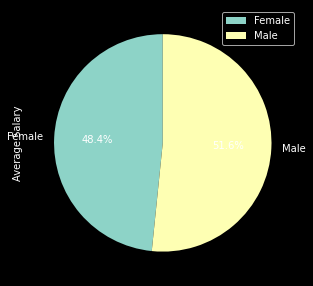

In [ ]:
gender_data.plot.pie(y='Average Salary',figsize=(5, 5),autopct='%1.1f%%', startangle=90)

# **What contributes to the gap in India**

In a country like India, the reasons for gender pay gap are a little more complicated and can be linked to reasons ranging from the socioeconomic to the structural. Girl children are sometimes kept out of schools or made to drop out of school early. Even if they are educated, many women are not allowed to work by their families. Women who do join the workforce often need to take extended leaves for maternity and child care, and even the healthcare of other family members. All these factors lead up to women as a a whole falling well behind men when it comes to their earnings over time.

Calculation of the salaries based on the candidate's 10th grade education and academic performance.

In [ ]:
tenth_avg_above80 = data.loc[data["10percentage"]>=80, "Salary"].mean()
print(tenth_avg_above80)

341669.04422253923


In [ ]:
tenth_avg_above60 = data.loc[(data["10percentage"] >= 60 ) & (data["10percentage"] < 80), "Salary"].mean()
print(tenth_avg_above60)

277385.58432470256


In [ ]:
min_10board = data["10percentage"].min()
tenth_avg_above43 = data.loc[(data["10percentage"] >= min_10board ) & (data["10percentage"] < 60), "Salary"].mean()
print(tenth_avg_above43)

236586.82634730538


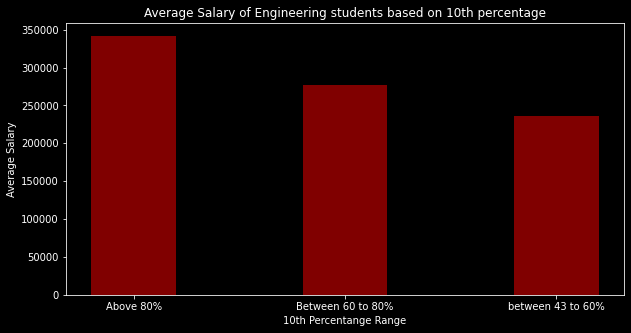

In [ ]:
tenth_board_dict = {'Above 80%': tenth_avg_above80, 'Between 60 to 80%': tenth_avg_above60, 'between 43 to 60%': tenth_avg_above43}
percentage_range = list(tenth_board_dict.keys())
avg_salary_10 = list(tenth_board_dict.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(percentage_range, avg_salary_10, color ='maroon',
        width = 0.4)
 
plt.xlabel("10th Percentange Range")
plt.ylabel("Average Salary")
plt.title("Average Salary of Engineering students based on 10th percentage")
plt.show()

Its observed from the above bar graph that students with percentage range 80-100 in 10th percentage are more likely to receive higher average salary as compared to other lower percentage ranges.

Calculation of the average salary based on 12th grade academic performance.

In [ ]:
twelfth_avg_above80 = data.loc[data["12percentage"]>=80, "Salary"].mean()
print(twelfth_avg_above80)
twelfth_avg_above60 = data.loc[(data["12percentage"] >= 60 ) & (data["12percentage"] < 80), "Salary"].mean()
print(twelfth_avg_above60)
min_12board = data["12percentage"].min()
twelfth_avg_above43 = data.loc[(data["12percentage"] >= min_12board ) & (data["12percentage"] < 60), "Salary"].mean()
print(twelfth_avg_above43)

349617.3212487412
289518.22323462414
238353.41365461846


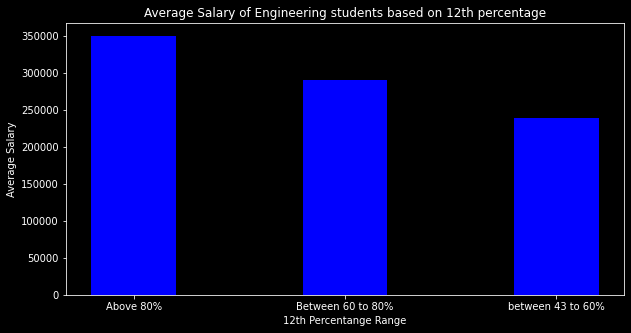

In [ ]:
twelfth_board_dict = {'Above 80%': twelfth_avg_above80, 'Between 60 to 80%': twelfth_avg_above60, 'between 43 to 60%': twelfth_avg_above43}
percentage_range12 = list(twelfth_board_dict.keys())
avg_salary_12 = list(twelfth_board_dict.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(percentage_range12, avg_salary_12, color ='blue',
        width = 0.4)
 
plt.xlabel("12th Percentange Range")
plt.ylabel("Average Salary")
plt.title("Average Salary of Engineering students based on 12th percentage")
plt.show()

Its observed from the above bar graph that students with percentage range 80-100 in 12th percentage are more likely to have more average salary as compared to other lower percentage ranges.

# **DOES CLASS 10TH AND 12TH PERCENTAGE REALLY MATTER DURING PLACEMENTS?**

In general, most companies do not really consider 10th or 12th board marks too much. Most times, the CGPA or percentage you get throughout your college years matters. There is no great weightage of 10th or 12th marks in the overall selection process. Most companies do not mind even if you have repeated a year. The very important parameters that are considered during campus placements are your grades, your knowledge, your projects and your training experience factor in the decision making process.

But, usually we consider 10th and 12th percentages because, the students who have done well or are academically strong since the beginning tend to do well in higher studies, ofcourse its a myth, but it is a strong one.


Deducing the relation between educational qualification and average salary (based on the specialization and area of expertise of the candidate).

In [ ]:
specialization_entries = data["Specialization"].unique()
print(specialization_entries)

['instrumentation and control engineering'
 'computer science & engineering' 'electronics & telecommunications'
 'biotechnology' 'mechanical engineering' 'information technology'
 'electronics and communication engineering' 'computer engineering'
 'computer application' 'computer science and technology'
 'electrical engineering' 'automobile/automotive engineering'
 'electronics and electrical engineering'
 'information science engineering' 'chemical engineering'
 'instrumentation engineering' 'electronics & instrumentation eng'
 'ceramic engineering' 'metallurgical engineering'
 'aeronautical engineering' 'electronics engineering'
 'electronics and instrumentation engineering'
 'applied electronics and instrumentation' 'civil engineering'
 'computer and communication engineering'
 'industrial & production engineering' 'computer networking' 'other'
 'electronics and computer engineering'
 'control and instrumentation engineering'
 'mechanical & production engineering' 'mechanical and au

557


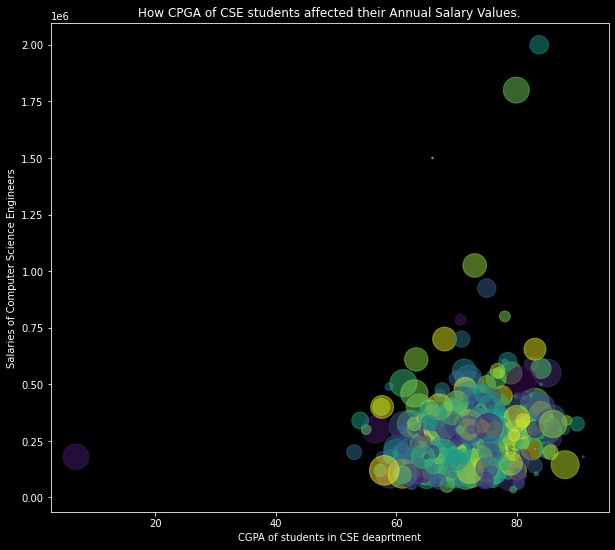

In [ ]:
cs_gpa = list(data[data["Specialization"]=="computer science & engineering"]["collegeGPA"])
print(len(cs_gpa))
cs_salary = list(data[data["Specialization"]=="computer science & engineering"]["Salary"])

# plt.plot(cs_gpa, cs_salary)
# plt.show()
N = 557
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2
fig = plt.figure(figsize = (10, 9))
plt.scatter(cs_gpa, cs_salary, s=area, c=colors, alpha=0.5)
plt.xlabel("CGPA of students in CSE deaprtment")
plt.ylabel("Salaries of Computer Science Engineers")
plt.title("How CPGA of CSE students affected their Annual Salary Values.")
plt.show()



## **INFERENCE**

It has been observed from the above scatter plot that CSE students which CGPAs between 6 and 10 end up with jobs most of the times. The dense plot we see shows that for students in range 6-9.5 have ended up with jobs which offer almost the same CTCs. But what we also infer from the graph that two people in the range 6-8 have been offered tier1 jobs which is more than 10 lakhs CTC and a single guy above 8 cgpa, has been offered 20 lakhs package.

From the graph, we observe that there's an outlier. If we carefully observe the graph, we can see that there's one bubble below 20 percent, which is technically fail and the inference we've drawn from it is that either the student didn't write his cgpa in terms of percentage and wrote the actual value because if this isnt the case, then that particular student/engineer has failed and isnt eligible to get jobs as he wont have the required certificate.

In [ ]:
indexNames = data[data["collegeGPA"] <= 35 ].index
data.drop(indexNames, inplace = True)
data

,ID,Gender,10percentage,12percentage,Specialization,collegeGPA,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,87.80,84.00,instrumentation and control engineering,73.82,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,57.00,64.50,computer science & engineering,65.00,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,77.33,85.17,electronics & telecommunications,61.94,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,84.30,86.00,computer science & engineering,80.40,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,82.00,75.00,biotechnology,64.30,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,103174,f,75.00,73.00,electronics and communication engineering,70.00,Tamil Nadu,2010,505,485,445,0.538387,245,333,-1,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,352811,f,84.00,77.00,information technology,75.20,Tamil Nadu,2012,345,585,395,0.190153,315,-1,-1,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,287070,m,91.40,65.56,information technology,73.19,Madhya Pradesh,2011,385,425,485,0.600057,435,-1,-1,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,317336,m,88.64,65.16,computer engineering,74.81,Karnataka,2011,465,645,505,0.901490,545,-1,-1,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000



The graphs modelled with respect to cgpa has had some discrepancy as a result of which there were some entries with a cgpa lower than 35%. Therefore, the DataSet has been reshaped by dropping the candidates wwho have falied (i.e., have a cgpa < 35). This enhances the analysis.

In [ ]:
ece_cgpa = list(data[data["Specialization"]=="electronics and communication engineering"]["collegeGPA"])
print("Number of ECE students in the given survey is ", len(ece_cgpa))
print("Number of CSE students in the given survey is ", len(cs_gpa))
ece_salary = data[data["Specialization"]=="electronics and communication engineering"]["Salary"].mean()
print("Average Salary of ECE students is ", ece_salary)
cs_avg_salary = data[data["Specialization"]=="computer science & engineering"]["Salary"].mean()
print("Average Salary of CSE students is ", cs_avg_salary)

Number of ECE students in the given survey is  670
Number of CSE students in the given survey is  557
Average Salary of ECE students is  288164.17910447763
Average Salary of CSE students is  278839.92805755395


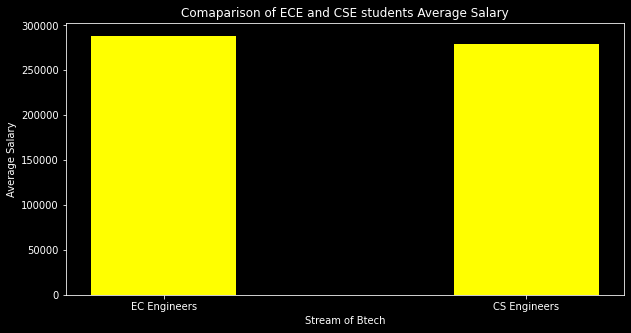

In [ ]:
cse_ece_dict = {'EC Engineers': ece_salary, 'CS Engineers': cs_avg_salary}
stream_ece_cs = list(cse_ece_dict.keys())
avg_salary_csece = list(cse_ece_dict.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(stream_ece_cs, avg_salary_csece, color ='yellow',
        width = 0.4)
 
plt.xlabel("Stream of Btech")
plt.ylabel("Average Salary")
plt.title("Comaparison of ECE and CSE students Average Salary")
plt.show()

It has been observed that Average Salary of ECE engineers is more than that of CS Engineers. But one thing to notice is that, the reason why Average Salary of ECE is more is because they are more in number in this survey by an amount of 113 students.

# **COMAPRISON OF ECE AND CS ENGINEERS SALARIES IN INDIA**

CSE course will be easy through out your 4 years but ECE will be very tough. Any branch that is integrated with electronics is named as an evergreen branch of engineering. Electronics is still an emerging sector in India and after the make in India thing we see a lot of boost in this sector but day by day its becoming hard to survive in sector related to CSE. More efficient people with lesser salary are available to work for the company and that is why people start getting kicked out during recession but since ECE has a demand everywhere, there might be a chance that you survive the heat.
CSE is better in terms of placement because many of ECE students got placed in IT not in core companies up to my knowledge. But if study ECE you can work in both IT and core companies, where as in CSE it is not possible. But if placements is the biggest concern, then always CSE is a better choice compared to ECE in India, as India is still emerging in terms of Electronics.

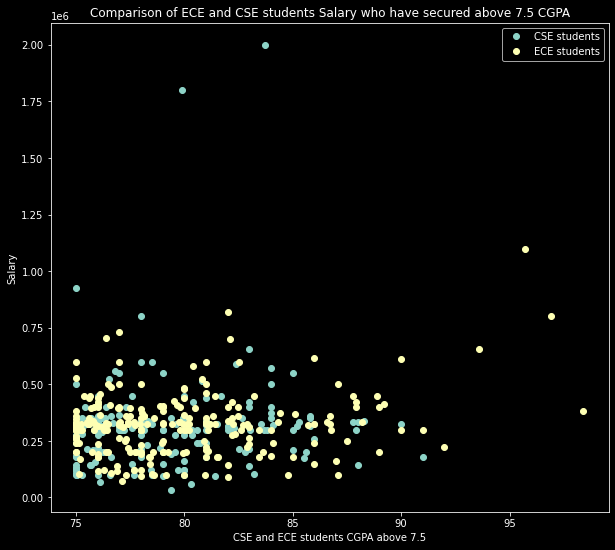

In [ ]:
specs_avg_above75 = data.loc[data["collegeGPA"]>=75, ["Specialization","Salary","collegeGPA"]]
# print(specs_avg_above75)
ece_above75 = specs_avg_above75[specs_avg_above75["Specialization"]=="electronics and communication engineering"]["Salary"]
ece_cgpa_above75 = specs_avg_above75[specs_avg_above75["Specialization"]=="electronics and communication engineering"]["collegeGPA"]
# print(ece_above75)
cse_above75 = specs_avg_above75[specs_avg_above75["Specialization"]=="computer science & engineering"]["Salary"]
cse_cgpa_above75 = specs_avg_above75[specs_avg_above75["Specialization"]=="computer science & engineering"]["collegeGPA"]
fig = plt.figure(figsize = (10, 9))
plt.plot(cse_cgpa_above75, cse_above75, 'o')
plt.plot(ece_cgpa_above75, ece_above75, 'o')
plt.xlabel("CSE and ECE students CGPA above 7.5")
plt.ylabel("Salary")
plt.title("Comparison of ECE and CSE students Salary who have secured above 7.5 CGPA")
plt.legend(["CSE students", "ECE students"])
plt.show()

Inferences from the above graph:

**CSE Students:**
1. more than 97% of cse students fall in the range 7.5-9 CGPA and have an annual CTC of upto 20 lakhs.
2. Number of CSE students are less than ECE.
3. Only one student was able to achieve CGPA more than 9 but from the obervations its clear that even after scoring good grades, the annual CTC is less compared to other CSE students.

**ECE Students:**
1. more than 95% of ece students fall in the range 7.5-9 CGPA and have an annual CTC of not more than 9 lakhs.
2. The number of ECE students are more than CSE students.
3. Its also seen that around 6-7 ECE students have CGPAs more than 9 whereas CSE students have not achieved CGPAs more than 9 except one student.

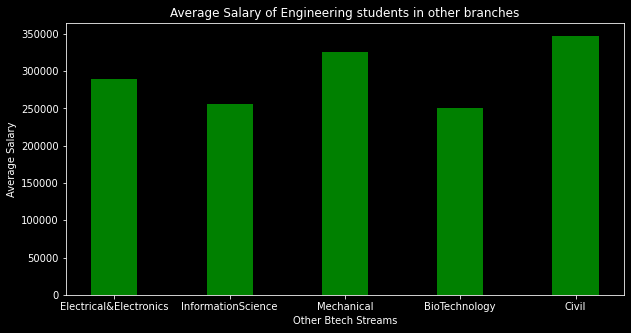

In [ ]:
eee_avg_salary = data[data["Specialization"]=="electronics and electrical engineering"]["Salary"].mean()
is_avg_salary = data[data["Specialization"]=="information science engineering"]["Salary"].mean()
mech_avg_salary = data[data["Specialization"]=="mechanical engineering"]["Salary"].mean()
bio_avg_salary = data[data["Specialization"]=="biotechnology"]["Salary"].mean()
civil_avg_salary = data[data["Specialization"]=="civil engineering"]["Salary"].mean()

other_streams_dict = {'Electrical&Electronics': eee_avg_salary, 'InformationScience': is_avg_salary, 'Mechanical': mech_avg_salary, 'BioTechnology': bio_avg_salary, 'Civil': civil_avg_salary}
streams_list = list(other_streams_dict.keys())
other_avg_list = list(other_streams_dict.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(streams_list, other_avg_list, color ='green',
        width = 0.4)
 
plt.xlabel("Other Btech Streams")
plt.ylabel("Average Salary")
plt.title("Average Salary of Engineering students in other branches")
plt.show()

From the above bar graph we observe that the average Salary of civil students is the highest compared to other Btech Streams, with the least being biotechnology.

### **SCOPE OF BIOTECHNOLOGY ENGINEERING IN INDIA AND PROBLEMS FACED BY BIOTECH ENGINEER.**

Biotechnology is an excellent career choice that solves many problems and also improves the quality of human lives. It contributes to the area like medicine, agriculture, food, and environment.

Most students choose the biotechnology career path after class 12thstd. But the problem comes when students don’t find jobs and also get into problems for higher studies.

While getting a Bachelor’s degree in Biotechnology, the student assumes they will become a Scientist. But the real thing is for becoming a scientist, a higher degree like Masters and Ph.D. is mandatory.

Many students don’t do research about biotech and develop unrealistic expectations. So, I am trying to provide the actual picture of the common problems faced by biotechnology students in India and how to overcome them.

 five common problems faced by the Biotechnology students in India are:

1. **Unawareness**
2. **The perception that Biotechnology has no scopes in India**
3. **Dealing with mathematics**
4. **Financial problems.**
5. **Salary packages in India.**

Lets take a look into the salary issue of biotech engineers.

When it comes to salary packages, all of us want higher packages as freshers. I have heard from my teachers that Biotech companies do not provide good packages to fresher’s at starting. Because of this, students start regretting pursuing Biotechnology.

But these things are happening with other fields as well. All fresher don’t get the high packages. The only myth is biotech fresher, don’t get high pay. If you really did internships, training, a very good grip on your basics, and have practical’s skills your starting salary may surprise you!




In [ ]:
graduation_years = list(data["GraduationYear"].unique())
# here we're just replacing zero years with a year of our own.
for i in range(len(graduation_years)):
  if graduation_years[i] == 0:
    graduation_years[i] = 2006
print(graduation_years)

[2013, 2014, 2011, 2012, 2010, 2015, 2009, 2017, 2016, 2006, 2007]


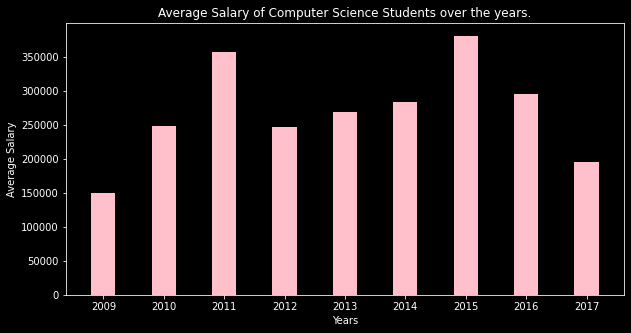

In [ ]:
cse = data[data["Specialization"] == "computer science & engineering"]
# print(tabulate(cse, headers='keys', tablefmt='psql'))
cse_dict = {}
cse_year = list(cse["GraduationYear"].unique())
cse_year.sort()
# print(cse_year)
for i in cse_year:
  avg_cse_salary = cse[cse["GraduationYear"] == i]["Salary"].mean()
  cse_dict[f"{i}"] = avg_cse_salary

years_cse = list(cse_dict.keys())
avg_salary_years_cse = list(cse_dict.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(years_cse, avg_salary_years_cse, color ='pink',
        width = 0.4)
 
plt.xlabel("Years")
plt.ylabel("Average Salary")
plt.title("Average Salary of Computer Science Students over the years.")
plt.show()


From the above graph we can observe that, the graduation year 2015 has the highest average salary of computer science students and the least being in the year 2009.

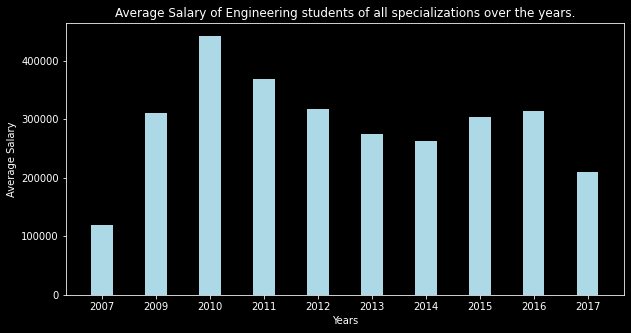

In [ ]:
engg_dict = {}
graduation_years.sort()
for i in graduation_years:
  avg_engg_salary = data[data["GraduationYear"] == i]["Salary"].mean()
  engg_dict[f"{i}"] = avg_engg_salary

years_grad = list(engg_dict.keys())
avg_salaries_engg = list(engg_dict.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(years_grad, avg_salaries_engg, color ='lightblue',
        width = 0.4)
 
plt.xlabel("Years")
plt.ylabel("Average Salary")
plt.title("Average Salary of Engineering students of all specializations over the years.")
plt.show()

From the above graph, we can observe that the graduation year 2010 has the highest average salary of engineering students from all specializations, whereas the least being in year 2007.

In [ ]:
# college states names and their total number
states = data["CollegeState"].unique()
print(states)
print(len(states))

['Delhi' 'Uttar Pradesh' 'Maharashtra' 'Tamil Nadu' 'Punjab' 'West Bengal'
 'Telangana' 'Andhra Pradesh' 'Haryana' 'Karnataka' 'Orissa'
 'Chhattisgarh' 'Rajasthan' 'Madhya Pradesh' 'Uttarakhand' 'Gujarat'
 'Jharkhand' 'Himachal Pradesh' 'Bihar' 'Union Territory'
 'Jammu and Kashmir' 'Kerala' 'Assam' 'Sikkim' 'Meghalaya' 'Goa']
26


Maximum Salary of the student in Karnataka is  1100000  who graduated in the year  2013 Of  computer science & engineering 



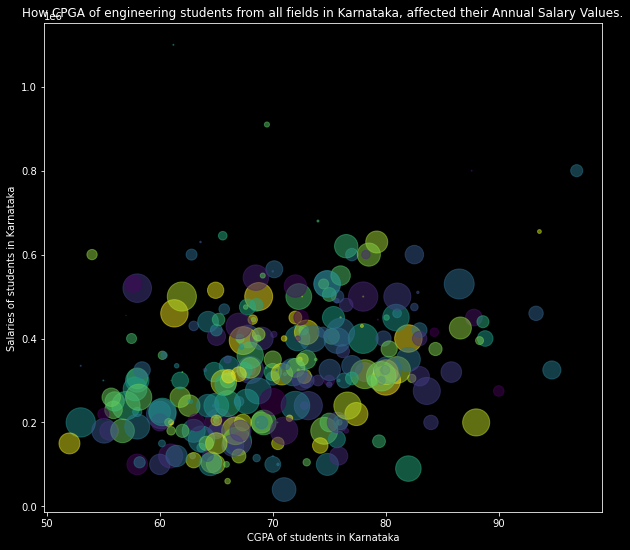

In [ ]:
# analysis of Karnataka State
karnataka_salary = list(data[data["CollegeState"] == "Karnataka"]["Salary"])
karnataka_cgpa = list(data[data["CollegeState"] == "Karnataka"]["collegeGPA"])
max_karnataka_salary = data[data["CollegeState"] == "Karnataka"]["Salary"].max()
a = list(data["Salary"]).index(max_karnataka_salary)

year = data["GraduationYear"][a]
specs = data["Specialization"][a]
print("Maximum Salary of the student in Karnataka is ",max_karnataka_salary," who graduated in the year ",year, "Of ",specs,"\n")
N = len(karnataka_salary)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2
fig = plt.figure(figsize = (10, 9))
plt.scatter(karnataka_cgpa, karnataka_salary, s=area, c=colors, alpha=0.5)
plt.xlabel("CGPA of students in Karnataka")
plt.ylabel("Salaries of students in Karnataka")
plt.title("How CPGA of engineering students from all fields in Karnataka, affected their Annual Salary Values.")
plt.show()



From the above Scatter plot we observe that most of the students in karnatake fall in the range of 5.5-9 CGPAs with annual ctcs ranging from 1 lakhs to 7 lakhs. However, **Maximum Salary of the student in Karnataka is 11 lakhs who graduated in the year 2010 Of electronics and communication engineering.**

With final placements starting in several top engineering colleges in Bengaluru, the institutions are expecting good responses from companies and increase in salary compensation for graduating students.

Colleges like PES University, RV college of Engineering, MS Ramaiah institute of technology offer a greate exposure to students and also have a great impact on their salaries after graduating. There's a reason why Bengaluru is the IT hub and the students/people in IT sector is extremely high and the city has best companies to provide so too.

[2012 2011 2013 2014 2010 2015 2009 2016]
{'2009': 333333.3333333333, '2010': 414473.6842105263, '2011': 402653.0612244898, '2012': 362758.6206896552, '2013': 303287.6712328767, '2014': 256111.11111111112, '2015': 565000.0, '2016': 325000.0} 



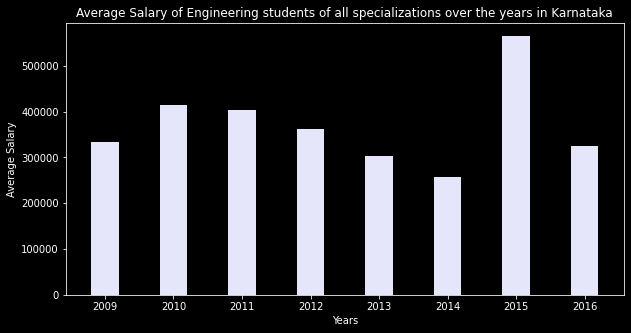

In [ ]:
karnataka = data[data["CollegeState"] == "Karnataka"]
k_dict = {}
karnataka_grad_years = karnataka["GraduationYear"].unique()
print(karnataka_grad_years)
karnataka_grad_years.sort()
for i in karnataka_grad_years:
  avg_karnataka_salary = karnataka[karnataka["GraduationYear"] == i]["Salary"].mean()
  k_dict[f"{i}"] = avg_karnataka_salary

print(k_dict, "\n")
kar_grad = list(k_dict.keys())
avg_salaries_kar = list(k_dict.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.style.use("dark_background")
plt.bar(kar_grad, avg_salaries_kar, color ='lavender',
        width = 0.4)
plt.xlabel("Years")
plt.ylabel("Average Salary")
plt.title("Average Salary of Engineering students of all specializations over the years in Karnataka")
plt.show()

From the above Bar Graph, we see that the average salary of engineering students in Karnataka is **highest in the year 2015 with the value of 565000 CTC.**

[330161.29032258067, 269057.6923076923, 264375.0, 312238.37209302327, 297911.6465863454]


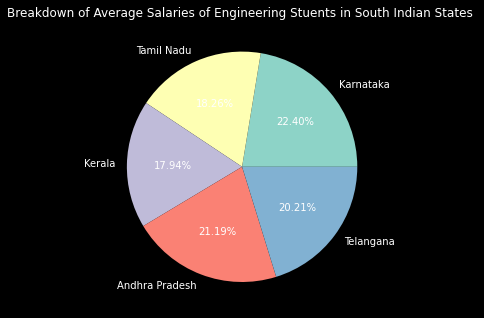

In [ ]:
# south indian states
states_si = ['Karnataka', 'Tamil Nadu', 'Kerala', 'Andhra Pradesh', 'Telangana']
si_avg_salary = []
for state in states_si:
  si_avg_salary.append(data[data["CollegeState"] == state]["Salary"].mean())
print(si_avg_salary)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(si_avg_salary, labels = states_si,autopct='%1.2f%%')
plt.title("Breakdown of Average Salaries of Engineering Stuents in South Indian States ")
plt.show()

The above pie chart depicts the breakdown of average salaries of engineering students in South India, with Karnataka having highest average salary and also Andhra Pradesh giving tough competition to it. The least is Kerala with a percentage of 17.91 contribution. 

## **SOUTH INIDA HAS MORE ENGINEERS COMPARED TO NORTH. WHY?**

All the answers here are satisfactory but many of them forgot one very important factor i.e the ideology of students and parents. In South India most of the households believe that only proper education can make them better and their children can have a bright future only if engineering is perceived. Hence it is very logical that there is a better scope of business in engineering colleges in South India rather than in North India. Another thing about the south Indians is that most of the people here are afraid of taking risks be it education or job or anything for that matter. In North India it is not the case the people in North India are more open to challenges and hence they take a risk in career or education. Most of my North Indian friends were never interested in engineering. They had various things in their minds like mass communication, fashion designing and many courses that south Indians would not even dare to take. So the best option in education where you can have a minimum guarantee is obviously to choose engineering. Apart from this the herd mentality is quite strong in South India(I might be a bit judgemental here but it's kinda true). So when one person starts taking a particular stream everyone tries to take the same. Since most people choose engineering so more number of colleges here.

The Highest average salary  450000.0
The Lowest average salary  257058.82352941178 



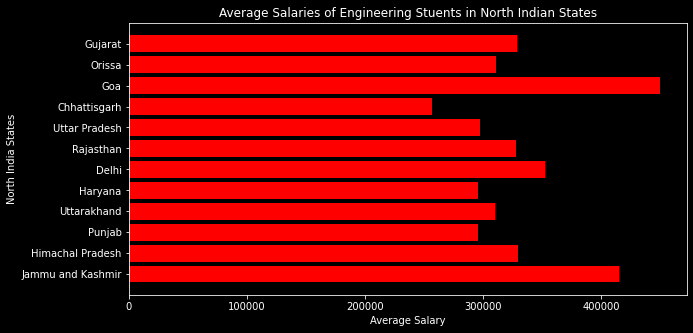

In [ ]:
# Jammu & Kashmir, Himachal Pradesh, Punjab, Uttarakhand, Haryana, Delhi, Rajasthan and Uttar Pradesh and UT Chandigarh.
states_ni = ['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Uttarakhand', 'Haryana', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Chhattisgarh', 'Goa', 'Orissa', 'Gujarat']
states_avg_ni = []
for state in states_ni:
  states_avg_ni.append(data[data["CollegeState"] == state]["Salary"].mean())

print("The Highest average salary ", max(states_avg_ni))
print("The Lowest average salary ", min(states_avg_ni),"\n")
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.style.use("dark_background")
plt.barh(states_ni, states_avg_ni, color ='red')
 
# setting label of y-axis
plt.ylabel("North India States")
 
# setting label of x-axis
plt.xlabel("Average Salary")
plt.title("Average Salaries of Engineering Stuents in North Indian States")
plt.show()


The above bar graph shows the average salaries of engineering students in North India. Things we infer from the graph is that Goa has the highest average salary distribution of engineering students of value 450000 compared to other north indian states, with the second in line being Jammu&Kashmir. The least being Chattisgarh with an average value of 257058.

Next we are going to discuss about AMCAT test
AMCAT stands for **Aspiring Minds Computer Adaptive Test**.
AMCAT is an AI-based computer adaptive test which evaluates job applicants on critical areas like communication skills, logical reasoning, quantitative skills, and job-specific domain skills thus helping recruiters identify the suitability of a candidate for different job roles. Basically, AMCAT tests students from different fields in various domains with the help of an in-depth micro analysis in each domain.

The test consists of various sections/modules which you can choose according to your profile or education background. There are certain modules which are compulsory for everyone like ENGLISH, Quantitative Ability, Logical Ability, Domain and AMPI, whereas others are optional. During the test, you will be given an option to select any two domain specific modules. Here AMPI which is a compulsory test because this module does an overall personality assessment of the candidate and is used to assess candidates in people-interaction and people-management roles which includes Extraversion,Conscientiousness, Neuroticism, Openness to Experience and Agreeableness.

The optional domain offers the following test, you need to write any two tests of your choice of subjects. the options include ComputerProgramming, Electronics and Semiconductors, Computer Science, Mechanical Engineering, Electrical Engineering, Telecommunication Engineering and Civil Engineering.

 A decent score here would be:

1. For Engineers – Above 450
2. For Graduates – Above 400
3. For MBAs – Above 425

in everything.

180
[326501.2248897599, 261712.70718232045, 201511.62790697673]


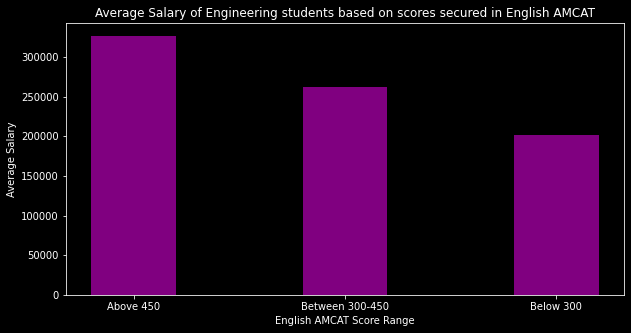

In [ ]:
english_salary_data = data[["English", "Salary"]]

english_avg_above450 = data.loc[data["English"]>=450, "Salary"].mean()
english_avg_above300 = data.loc[(data["English"] >= 300 ) & (data["English"] < 450), "Salary"].mean()
min_english = data["English"].min()
print(min_english)
english_avg_abovemin = data.loc[(data["English"] >= min_english ) & (data["English"] < 300), "Salary"].mean()

english_data = {"Above 450": english_avg_above450, "Between 300-450": english_avg_above300, "Below 300": english_avg_abovemin}
score_range = list(english_data.keys())
english_avg_total = list(english_data.values())
print(english_avg_total)
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(score_range, english_avg_total, color ='purple',
        width = 0.4)
 
plt.xlabel("English AMCAT Score Range")
plt.ylabel("Average Salary")
plt.title("Average Salary of Engineering students based on scores secured in English AMCAT")
plt.show()

# X = ['Group A','Group B','Group C','Group D']
# Ygirls = [10,20,20,40]
# Zboys = [20,30,25,30]
  
# X_axis = np.arange(len(X))
  
# plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
# plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
  
# plt.xticks(X_axis, X)
# plt.xlabel("Groups")
# plt.ylabel("Number of Students")
# plt.title("Number of Students in each group")
# plt.legend()
# plt.show()

The above graph depicts the average salaries of engineering students based on the scores secured in Englosh test AMCAT. Its observed that students who secured marks above 450 in English, have highest average salary value as compared to other scores. Whereas students who scored less than 300 in the test, failed to live upto the mark.

Female students average salaries [308079.26829268294, 253286.38497652582, 192500.0]
Male students average salaries [332352.4854744997, 264306.3583815029, 204242.42424242425]


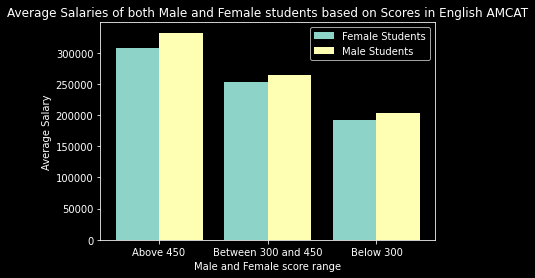

In [ ]:
female_eng_sal_data = data[data["Gender"] == 'f'][["English", "Salary"]]
male_eng_sal_data = data[data["Gender"] == 'm'][["English", "Salary"]]
female_above450 = female_eng_sal_data.loc[female_eng_sal_data["English"]>=450, "Salary"].mean()
male_above450 = male_eng_sal_data.loc[male_eng_sal_data["English"]>=450, "Salary"].mean()
female_above300 = female_eng_sal_data.loc[(female_eng_sal_data["English"] >= 300 ) & (female_eng_sal_data["English"] < 450), "Salary"].mean()
female_sal_min = female_eng_sal_data["English"].min()
female_abovemin = female_eng_sal_data.loc[(female_eng_sal_data["English"] >= female_sal_min ) & (female_eng_sal_data["English"] < 300), "Salary"].mean()
male_sal_min = male_eng_sal_data["English"].min()
male_above300 = male_eng_sal_data.loc[(male_eng_sal_data["English"] >= 300 ) & (male_eng_sal_data["English"] < 450), "Salary"].mean()
male_abovemin = male_eng_sal_data.loc[(male_eng_sal_data["English"] >= male_sal_min ) & (male_eng_sal_data["English"] < 300), "Salary"].mean()
X = ['Above 450','Between 300 and 450','Below 300']
female_values = [female_above450, female_above300, female_abovemin]
male_values = [male_above450, male_above300, male_abovemin]
print("Female students average salaries", female_values)
print("Male students average salaries", male_values)
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, female_values, 0.4, label = 'Female Students')
plt.bar(X_axis + 0.2, male_values, 0.4, label = 'Male Students')
  
plt.xticks(X_axis, X)
plt.xlabel("Male and Female score range")
plt.ylabel("Average Salary")
plt.title("Average Salaries of both Male and Female students based on Scores in English AMCAT")
plt.legend()
plt.show()

Inferences from the Graph:
1. Male students have higher average salary compared to female students in every aspect.


No handles with labels found to put in legend.


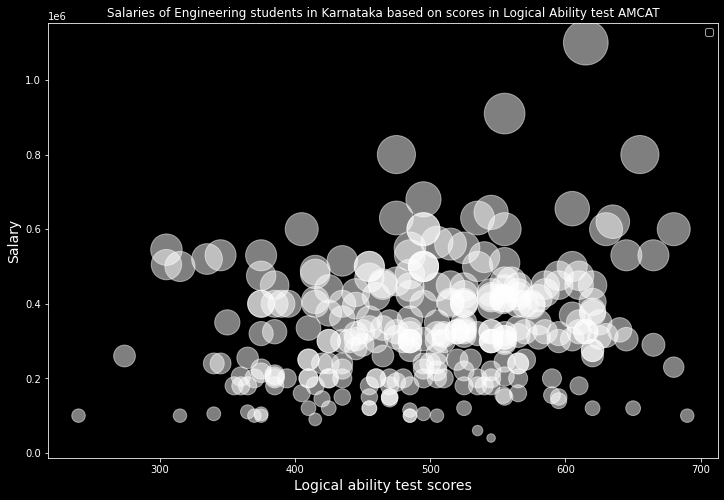

In [ ]:
karnataka_log_sal_data = data[data["CollegeState"] == 'Karnataka'][["Logical", "Salary"]]
y_axis = karnataka_log_sal_data["Salary"]
x_axis = karnataka_log_sal_data["Logical"]

b_normal = y_axis / y_axis.max()
plt.figure(figsize=(12, 8))
plt.scatter(x_axis, y_axis, 
                  color='white', 
                 alpha=0.5,
                 s = b_normal * 2000)
plt.xlabel("Logical ability test scores", size=14)
plt.ylabel("Salary", size=14)
plt.title("Salaries of Engineering students in Karnataka based on scores in Logical Ability test AMCAT")
plt.legend()
plt.show()

We can get an idea about the salaries by the size of the bubbles. The smaller the bubbles, the smaller is the salary of that particular student. Thats what the above **BUBBLE PLOT** represents. However its observed that larger bubble is in the range above 600 under logical ability test scores, which means that that particular student has higher salary too.

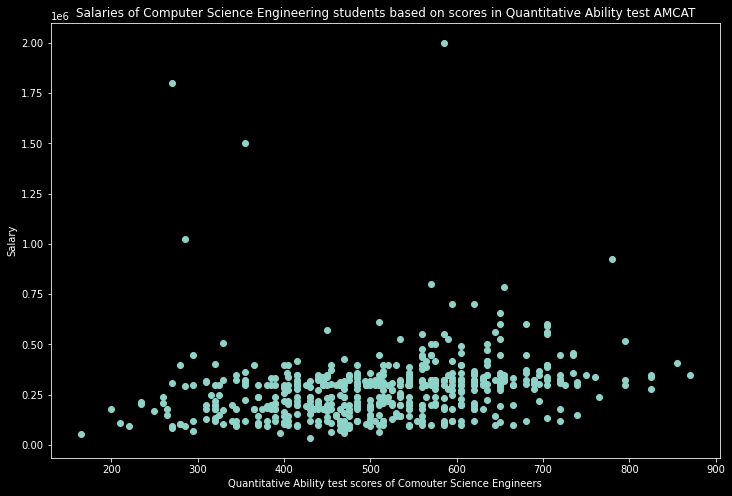

In [ ]:
comp_data = data[data["Specialization"] == 'computer science & engineering'][["Quant", "Salary"]]
quant_comp = list(comp_data["Quant"])
salary_comp = list(comp_data["Salary"])
plt.figure(figsize=(12, 8))
plt.plot(quant_comp, salary_comp, 'o')
plt.xlabel("Quantitative Ability test scores of Comouter Science Engineers")
plt.ylabel("Salary")
plt.title("Salaries of Computer Science Engineering students based on scores in Quantitative Ability test AMCAT")
plt.show()

In the above graph we've compared Salaries of Computer Science Engineers all over India based on their scores in Quantitative Ability AMCAT.
Its observed that lot of students fall under the category of 300-700 test scores. The highest salary is of the student who has a test score of right under 600 with salary of 20lakhs CTC. Whereas students who performed extremely well in the test have not lived upto the mark in terms of their annual salary.

In [ ]:
cp_es_data = data.loc[(data["ComputerProgramming"] != -1 ) & (data["ElectronicsAndSemicon"] != -1), "Salary"].count()
es_tc_data = data.loc[(data["TelecomEngg"] != -1 ) & (data["ElectronicsAndSemicon"] != -1), "Salary"].count()
cp_cs_data = data.loc[(data["ComputerProgramming"] != -1 ) & (data["ComputerScience"] != -1), "Salary"].count()
ec_ee_data = data.loc[(data["ElectricalEngg"] != -1 ) & (data["ComputerProgramming"] != -1), "Salary"].count()
me_cp_data = data.loc[(data["ComputerProgramming"] != -1 ) & (data["MechanicalEngg"] != -1), "Salary"].count()
ci_cp_data = data.loc[(data["ComputerProgramming"] != -1 ) & (data["CivilEngg"] != -1), "Salary"].count()
print("Number of students who wrote Computer Programming and ElectronicsAndSemiconductors in their optional domain assesments ", cp_es_data)
print("Number of students who wrote Telecom Engineering and ElectronicsAndSemiconductors in their optional domain assesments ",es_tc_data)
print("Number of students who wrote Computer Programming and Computer Science in their optional domain assesments ",cp_cs_data)
print("Number of students who wrote Electrical Engineering and ElectronicsAndSemiconductors in their optional domain assesments ",ec_ee_data)
print("Number of students who wrote Computer Programming and Mechanical Engineering in their optional domain assesments ",me_cp_data)
print("Number of students who wrote Civil Engineering and Computer Programming in their optional domain assesments ",ci_cp_data)

Number of students who wrote Computer Programming and ElectronicsAndSemiconductors in their optional domain assesments  501
Number of students who wrote Telecom Engineering and ElectronicsAndSemiconductors in their optional domain assesments  234
Number of students who wrote Computer Programming and Computer Science in their optional domain assesments  663
Number of students who wrote Electrical Engineering and ElectronicsAndSemiconductors in their optional domain assesments  69
Number of students who wrote Computer Programming and Mechanical Engineering in their optional domain assesments  56
Number of students who wrote Civil Engineering and Computer Programming in their optional domain assesments  15


[312075.8483033932, 282564.10256410256, 263476.62141779787, 251594.20289855072, 361160.71428571426, 343333.3333333333]


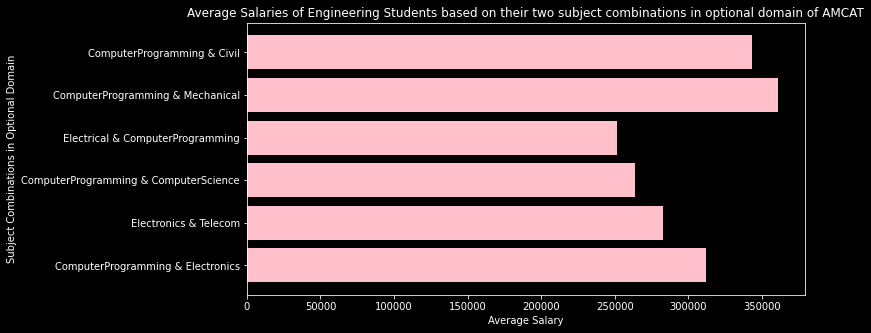

In [ ]:
cp_es_avg = data.loc[(data["ComputerProgramming"] != -1 ) & (data["ElectronicsAndSemicon"] != -1), "Salary"].mean()
es_tc_avg = data.loc[(data["TelecomEngg"] != -1 ) & (data["ElectronicsAndSemicon"] != -1), "Salary"].mean()
cp_cs_avg = data.loc[(data["ComputerProgramming"] != -1 ) & (data["ComputerScience"] != -1), "Salary"].mean()
ec_ee_avg = data.loc[(data["ElectricalEngg"] != -1 ) & (data["ComputerProgramming"] != -1), "Salary"].mean()
me_cp_avg = data.loc[(data["ComputerProgramming"] != -1 ) & (data["MechanicalEngg"] != -1), "Salary"].mean()
ci_cp_avg = data.loc[(data["ComputerProgramming"] != -1 ) & (data["CivilEngg"] != -1), "Salary"].mean()
combination_avg = [cp_es_avg, es_tc_avg, cp_cs_avg, ec_ee_avg, me_cp_avg, ci_cp_avg]
combination_names = ["ComputerProgramming & Electronics", "Electronics & Telecom", "ComputerProgramming & ComputerScience", "Electrical & ComputerProgramming", "ComputerProgramming & Mechanical", "ComputerProgramming & Civil"]

print(combination_avg)
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.style.use("dark_background")
plt.barh(combination_names, combination_avg, color ='pink')
 
# setting label of y-axis
plt.ylabel("Subject Combinations in Optional Domain")
 
# setting label of x-axis
plt.xlabel("Average Salary")
plt.title("Average Salaries of Engineering Students based on their two subject combinations in optional domain of AMCAT")
plt.show()

The above graph shows the average salaries of Engineering students based on their two subject combinations in their optional domain assesments.
It's very evident from the above graph that students who have taken ComputerProgramming and Mechanical Engineering as their combination have performed well with respect to average salaries.

[2300000, 800000, 2000000, 505000, 1300000, 700000]


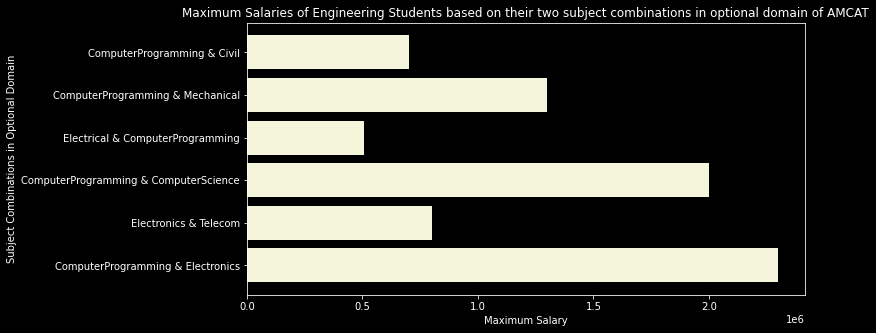

In [ ]:
cp_es_max = data.loc[(data["ComputerProgramming"] != -1 ) & (data["ElectronicsAndSemicon"] != -1), "Salary"].max()
es_tc_max = data.loc[(data["TelecomEngg"] != -1 ) & (data["ElectronicsAndSemicon"] != -1), "Salary"].max()
cp_cs_max = data.loc[(data["ComputerProgramming"] != -1 ) & (data["ComputerScience"] != -1), "Salary"].max()
ec_ee_max = data.loc[(data["ElectricalEngg"] != -1 ) & (data["ComputerProgramming"] != -1), "Salary"].max()
me_cp_max = data.loc[(data["ComputerProgramming"] != -1 ) & (data["MechanicalEngg"] != -1), "Salary"].max()
ci_cp_max = data.loc[(data["ComputerProgramming"] != -1 ) & (data["CivilEngg"] != -1), "Salary"].max()
combination_max = [cp_es_max,es_tc_max,cp_cs_max,ec_ee_max,me_cp_max,ci_cp_max]
print(combination_max)
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.style.use("dark_background")
plt.barh(combination_names, combination_max, color ='beige')
 
# setting label of y-axis
plt.ylabel("Subject Combinations in Optional Domain")
 
# setting label of x-axis
plt.xlabel("Maximum Salary")
plt.title("Maximum Salaries of Engineering Students based on their two subject combinations in optional domain of AMCAT")
plt.show()


The above bar graph depicts the maximum salaries of engineering students based on their two subject combinations in optional domain of AMCAT.
Its very clear from the graph, that maximum salary out of all the students who took ComputerProgrammimg and electronics is 23lakhs. and the least maximum salary is of the students who took ComputerProgrammimg and civil of value 7 lakhs.

The amcat personality test is based on the contemporary five-factor model of personality also commonly known as the “Big Five” model. It measures five broad traits:

**Extraversion**
**Conscientiousness**
**Neuroticism**
**Openness to Experience**
and **Agreeableness **

Till date, it is the most scientifically advanced and validated model of personality. The five factors being –

**Extroversion (E):** An extroverted, talkative, socially confident person

**Openness To experience (O)**: A broad-minded, unconventional, imaginative person with rich artistic sensitivity

**Neuroticism** is the trait disposition to experience negative affects, including anger, anxiety, self‐consciousness, irritability, emotional instability, and depression

**Conscientiousness (C):** An organized, responsible, hardworking and achievement-oriented person

**Agreeableness (A):** A kind, sympathetic, cooperative and warm person

For each trait, a Z-score is provided which measures the number of standard deviations the score is away from the mean of the norm. A Z-score which is more than +0.44 means the candidate is in the top 33%, whereas a Z-score of less than -0.44 indicates the candidate is in the lowest 33%.

[285787.5457875458, 303643.41085271316, 277663.04347826086]
[302422.22222222225, 304916.5596919127, 321522.5806451613]


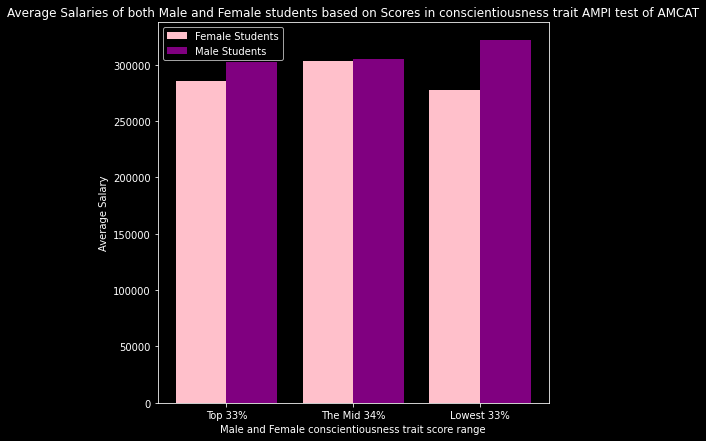

In [ ]:
sum_column = data["conscientiousness"] + data["agreeableness"] + data["extraversion"] + data["nueroticism"] + data["openess_to_experience"]
female_pers_data = data[data["Gender"] == 'f'][["conscientiousness","agreeableness","extraversion", "nueroticism", "openess_to_experience", "Salary"]]
male_pers_data = data[data["Gender"] == 'm'][["conscientiousness","agreeableness","extraversion", "nueroticism", "openess_to_experience", "Salary"]]
female_top_33_cons = female_pers_data.loc[female_pers_data["conscientiousness"]>=0.44, "Salary"].mean()
male_top_33_cons = male_pers_data.loc[male_pers_data["conscientiousness"]>=0.44, "Salary"].mean()
female_bottom_33 = female_pers_data.loc[female_pers_data["conscientiousness"]<=-0.44, "Salary"].mean()
male_bottom_33 = male_pers_data.loc[male_pers_data["conscientiousness"]<=-0.44, "Salary"].mean()
female_mid = female_pers_data.loc[(female_pers_data["conscientiousness"] > -0.44 ) & (female_pers_data["conscientiousness"] < 0.44), "Salary"].mean()
male_mid = male_pers_data.loc[(male_pers_data["conscientiousness"] > -0.44 ) & (male_pers_data["conscientiousness"] < 0.44), "Salary"].mean()
X1 = ['Top 33%','The Mid 34%','Lowest 33%']
female_values1 = [female_top_33_cons, female_mid, female_bottom_33]
male_values1 = [male_top_33_cons, male_mid, male_bottom_33]
print(female_values1)
print(male_values1)
X1_axis = np.arange(len(X1))
plt.figure(figsize=(7, 7))
plt.bar(X1_axis - 0.2, female_values1, 0.4, label = 'Female Students', color="pink")
plt.bar(X1_axis + 0.2, male_values1, 0.4, label = 'Male Students', color="purple")
  
plt.xticks(X1_axis, X1)
plt.xlabel("Male and Female conscientiousness trait score range")
plt.ylabel("Average Salary")
plt.title("Average Salaries of both Male and Female students based on Scores in conscientiousness trait AMPI test of AMCAT")
plt.legend()
plt.show()


From the graph, we infer that again male students have average salary more in all aspects when compared to female students.
But surprisingly the male students who are in lowest 33%, have greater average salary of 321985 when compared to other male students in the top and mid category of value 301934 and 304955.

[288165.93886462884, 277565.44502617803, 264926.4705882353]
[294980.91603053437, 286568.6274509804, 279150.32679738564]


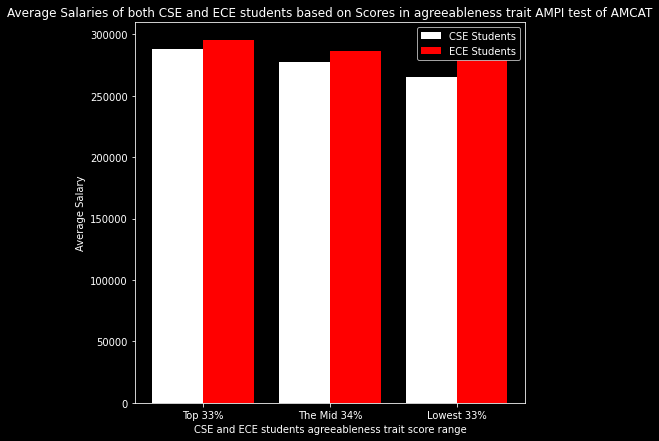

In [ ]:
comp_pers_data = data[data["Specialization"] == 'computer science & engineering'][["agreeableness","Salary"]]
ec_pers_data = data[data["Specialization"] == 'electronics and communication engineering'][["agreeableness","Salary"]]

comp_top_33_cons = comp_pers_data.loc[comp_pers_data["agreeableness"]>=0.44, "Salary"].mean()
ec_top_33_cons = ec_pers_data.loc[ec_pers_data["agreeableness"]>=0.44, "Salary"].mean()
comp_bottom_33 = comp_pers_data.loc[comp_pers_data["agreeableness"]<=-0.44, "Salary"].mean()
ec_bottom_33 = ec_pers_data.loc[ec_pers_data["agreeableness"]<=-0.44, "Salary"].mean()
comp_mid = comp_pers_data.loc[(comp_pers_data["agreeableness"] > -0.44 ) & (comp_pers_data["agreeableness"] < 0.44), "Salary"].mean()
ec_mid = ec_pers_data.loc[(ec_pers_data["agreeableness"] > -0.44 ) & (ec_pers_data["agreeableness"] < 0.44), "Salary"].mean()

comp_values1 = [comp_top_33_cons, comp_mid, comp_bottom_33]
ec_values1 = [ec_top_33_cons, ec_mid, ec_bottom_33]
print(comp_values1)
print(ec_values1)
X1_axis = np.arange(len(X1))
plt.figure(figsize=(7, 7))
plt.bar(X1_axis - 0.2, comp_values1, 0.4, label = 'CSE Students', color="white")
plt.bar(X1_axis + 0.2, ec_values1, 0.4, label = 'ECE Students', color="red")
  
plt.xticks(X1_axis, X1)
plt.xlabel("CSE and ECE students agreeableness trait score range")
plt.ylabel("Average Salary")
plt.title("Average Salaries of both CSE and ECE students based on Scores in agreeableness trait AMPI test of AMCAT")
plt.legend()
plt.show()

From the graph, we infer that ECE students have average salary more in all aspects when compared to CSE students based on scores in agreeableness trait.

[301988.5496183206, 308744.93927125505, 304700.944386149]


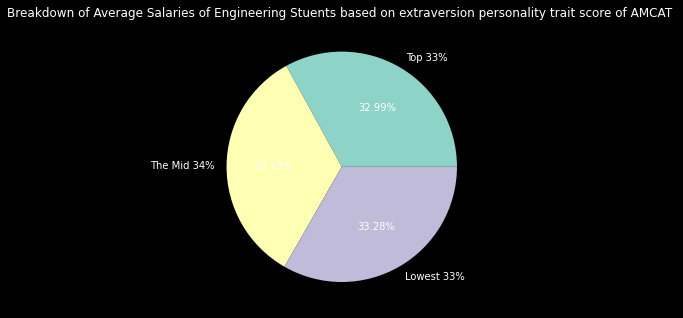

In [ ]:
eng_top_33 = data.loc[data["extraversion"]>=0.44, "Salary"].mean()
eng_bottom = data.loc[data["extraversion"]<=-0.44, "Salary"].mean()
eng_mid = data.loc[(data["extraversion"] > -0.44 ) & (data["extraversion"] < 0.44), "Salary"].mean()
extra_avg = [eng_top_33, eng_mid, eng_bottom]
print(extra_avg)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(extra_avg, labels = X1,autopct='%1.2f%%')
plt.title("Breakdown of Average Salaries of Engineering Stuents based on extraversion personality trait score of AMCAT ")
plt.show()

From the above graph we infer that the Mid 34% category of students have highest average salary compared to other categories and again surprisingly the top 33% have are at the bottom in terms of average salary. The mid 34% average salary is 308767 and that of top 33% is 301621.

[277445.28301886795, 315378.4860557769, 314869.7478991597]
[302130.24282560707, 304574.0210124164, 308190.15444015444]
[795, 1004, 1190]
[906, 1047, 1047]


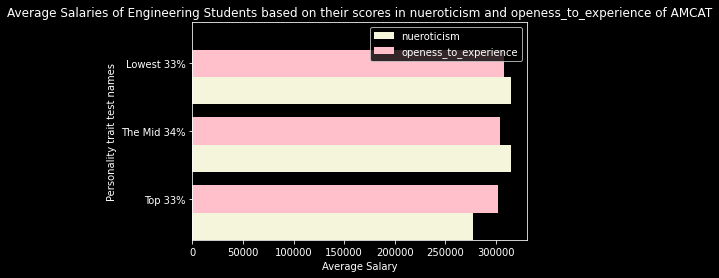

In [ ]:
 nue_open_data = data[["nueroticism", "openess_to_experience", "Salary"]]
nue_top_33 = data.loc[data["nueroticism"]>=0.44, "Salary"].mean()
nue_bottom = data.loc[data["nueroticism"]<=-0.44, "Salary"].mean()
nue_mid = data.loc[(data["nueroticism"] > -0.44 ) & (data["nueroticism"] < 0.44), "Salary"].mean()
open_top_33 = data.loc[data["openess_to_experience"]>=0.44, "Salary"].mean()
open_bottom = data.loc[data["openess_to_experience"]<=-0.44, "Salary"].mean()
open_mid = data.loc[(data["openess_to_experience"] > -0.44 ) & (data["openess_to_experience"] < 0.44), "Salary"].mean()
nue_list = [nue_top_33, nue_mid, nue_bottom]
open_list = [open_top_33, open_mid, open_bottom]
nue_open_data = data[["nueroticism", "openess_to_experience", "Salary"]]
nue_top_33_count = data.loc[data["nueroticism"]>=0.44, "Salary"].count()
nue_bottom_count = data.loc[data["nueroticism"]<=-0.44, "Salary"].count()
nue_mid_count = data.loc[(data["nueroticism"] > -0.44 ) & (data["nueroticism"] < 0.44), "Salary"].count()
open_top_33_count = data.loc[data["openess_to_experience"]>=0.44, "Salary"].count()
open_bottom_count = data.loc[data["openess_to_experience"]<=-0.44, "Salary"].count()
open_mid_count = data.loc[(data["openess_to_experience"] > -0.44 ) & (data["openess_to_experience"] < 0.44), "Salary"].count()
nue_count = [nue_top_33_count,nue_mid_count,nue_bottom_count]
open_count = [open_top_33_count, open_mid_count, open_mid_count]
print(nue_list)
print(open_list)
print(nue_count)
print(open_count)
X2 = ['Top 33%','The Mid 34%','Lowest 33%']
# X2_axis = np.arange(len(X2))
# plt.figure(figsize=(8, 8))
# plt.barh(X2_axis - 0.2, nue_list, 0.4, label = 'nueroticism', color="beige")
# plt.barh(X2_axis + 0.2, open_list, 0.4, label = 'openess_to_experience', color="brown")

# plt.xticks(X2_axis, X2)
# # fig = plt.figure(figsize = (10, 5))
 
# # # creating the bar plot
# # plt.style.use("dark_background")
# # plt.barh(combination_names, combination_avg, color ='pink')
 
# # setting label of y-axis

# plt.legend()
# plt.show()

df = pd.DataFrame(dict(graph=X2,
                           n = nue_list, m=open_list)) 

ind = np.arange(len(df))
width = 0.4
fig, ax = plt.subplots()
ax.barh(ind, df.n, width, color='beige', label='nueroticism')
ax.barh(ind + width, df.m, width, color='pink', label='openess_to_experience')

ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
plt.ylabel("Personality trait test names")
 
# setting label of x-axis
plt.xlabel("Average Salary")
plt.title("Average Salaries of Engineering Students based on their scores in nueroticism and openess_to_experience of AMCAT")
ax.legend()

plt.show()

The above graph depicts average salaries of engineering students based on their scores in **nueroticism** and **openess_to_experience** personality test of AMCAT.

First lets take a look at nueroticism. Here the Students who are in top 33%, have lesser average salary compared to both mid 34% and lowest 33%. From the graph, its clear that the mid 34% have highest average salary based on scores in nueroticism alone.

Now, lets take a look at openess to experience, Here the students of all categories have average salaries almost equal to each other. But when we look at the values closely, we see that students who are in top 33%, have least average salary and  the lowest 33% have highest average salary based on scores in openess_to_experience alone.

[797, 1007, 1194]
[909, 1049, 1049]

But, we also need to keep in mind that the number of students who are in top 33% of nueroticism are 797, and those in mid 34% are 1007 and the lowest 33% are 1194 students.

Same thing with openess to experience, no of students in top 33% are 909, and those in mid 34% are 1049 and the lowest 33% are 1049 students.

Split arrays or matrices into random train and test subsets

In [ ]:
from sklearn.model_selection import train_test_split

Here we take the datasets of college GPA columns and Their corresponding salary as well.
We divide them randomly using the above library, into 2/3rd and 1/3rd. The first 2/3rd we assign it for training purposes and the other 1/3rd is for testing purpose based on the ML model created for the first 2/3rd dataset.

      collegeGPA  Salary
0          73.82  445000
1          65.00  110000
2          61.94  255000
3          80.40  420000
4          64.30  200000
...          ...     ...
2993       70.00  120000
2994       75.20  120000
2995       73.19  385000
2996       74.81  530000
2997       69.30  200000

[2989 rows x 2 columns]


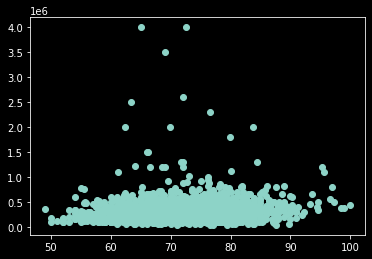

In [ ]:
tenth_salary_analysis = data[["collegeGPA", "Salary"]]
print(tenth_salary_analysis)
plt.scatter(tenth_salary_analysis["collegeGPA"], tenth_salary_analysis["Salary"])
plt.show()

In [ ]:
x = tenth_salary_analysis.iloc[:,:-1].values
y = tenth_salary_analysis.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state=20)

so here we train our data with x_train and y_train and make sure the model generated based on it will be tested based on x_test values, and depending on the values we get, we take out the corresponding y_test value.

# **LINEAR** **REGRESSION**

Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).

When there is a single input variable (x), the method is referred to as simple linear regression. When there are multiple input variables, literature from statistics often refers to the method as multiple linear regression.

For example, in a simple regression problem (a single x and a single y), the form of the model would be:

                          y = B0 + B1*x

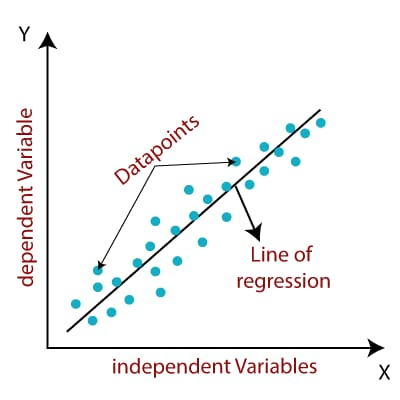

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)
y_pred_LR = LR.predict(x_test)
diff_LR = y_test - y_pred_LR
lreg_df = pd.concat([pd.Series(y_pred_LR), pd.Series(y_test), pd.Series(diff_LR)], axis=1)
lreg_df.columns = ["Prediction", "Original Data", "Residual"]
print(lreg_df)

        Prediction  Original Data       Residual
0    266946.194859         335000   68053.805141
1    321030.110413         240000  -81030.110413
2    306072.527517         300000   -6072.527517
3    258833.607526         200000  -58833.607526
4    321410.387944         475000  153589.612056
..             ...            ...            ...
992  347227.007009         500000  152772.992991
993  321030.110413         350000   28969.889587
994  283002.357289         225000  -58002.357289
995  269227.860047         320000   50772.139953
996  312579.498607         120000 -192579.498607

[997 rows x 3 columns]


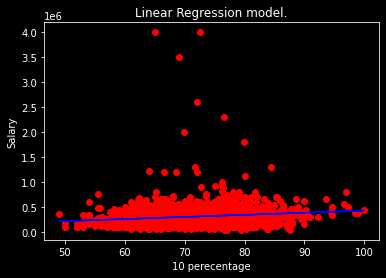

In [ ]:
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, LR.predict(x_train), color='blue')
plt.xlabel("10 perecentage")
plt.ylabel("Salary")
plt.title("Linear Regression model.")
plt.show()

Analysis based on training data, regression line is drawn, but the data points are slightly farther away from the line, and hence the regression has not completely been acccurate in this case, but since the values are scattered and not in order since beginning, the regression line did a pretty good job. This graph was based on salary vs cgpa based on training set itself.

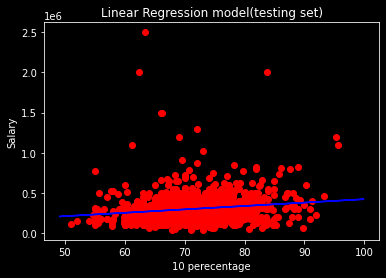

In [ ]:
plt.scatter(x_test, y_test, color="red")
plt.plot(x_train, LR.predict(x_train), color='blue')
plt.xlabel("10 perecentage")
plt.ylabel("Salary")
plt.title("Linear Regression model(testing set)")
plt.show()

# **METRICS**

Evaluation metrics are a measure of how good a model performs and how well it approximates the relationship.

### **Root Mean Squared Error (RMSE)**

This is the square root of the average of the squared difference of the predicted and actual value.
R-squared error is better than RMSE. This is because R-squared is a relative measure while RMSE is an absolute measure of fit (highly dependent on the variables — not a normalized measure).
Basically, RMSE is just the root of the average of squared residuals. We know that residuals are a measure of how distant the points are from the regression line. Thus, RMSE measures the scatter of these residuals.

Root mean square error. Image by the author.
RMSE penalizes large errors.

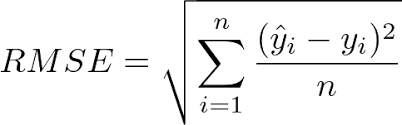

In [ ]:
from sklearn import metrics

In [ ]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR))
print(rmse)

194631.4652735942


The rmse value is decent enough, since our salary values are in lakhs range, and getting this rmse value is pretty decent itself. But again, not that great either.

In [ ]:
R2 = metrics.r2_score(y_test, y_pred_LR)
print(R2)

0.025681179210380156


This r2 score is bad because in other fields, the standards for a good R-Squared reading can be much higher, such as 0.9 or above. In finance, an R-Squared above 0.7 would generally be seen as showing a high level of correlation, whereas a measure below 0.4 would show a low correlation.

Therefore we cant use this linear regression model because we cant implement with such low r2 score.


## **Grid Search CV**
GridSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import seaborn as sns
def print_evaluate(predicted,true):  
    mse = metrics.mean_squared_error(true, predicted)
    print('MSE:', mse)
    
def draw_missing_data_table(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing_data_table(data)
data

,ID,Gender,10percentage,12percentage,Specialization,collegeGPA,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,87.80,84.00,instrumentation and control engineering,73.82,Delhi,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,57.00,64.50,computer science & engineering,65.00,Uttar Pradesh,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,77.33,85.17,electronics & telecommunications,61.94,Maharashtra,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,84.30,86.00,computer science & engineering,80.40,Delhi,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,82.00,75.00,biotechnology,64.30,Tamil Nadu,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,103174,f,75.00,73.00,electronics and communication engineering,70.00,Tamil Nadu,2010,505,485,445,0.538387,245,333,-1,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,352811,f,84.00,77.00,information technology,75.20,Tamil Nadu,2012,345,585,395,0.190153,315,-1,-1,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,287070,m,91.40,65.56,information technology,73.19,Madhya Pradesh,2011,385,425,485,0.600057,435,-1,-1,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,317336,m,88.64,65.16,computer engineering,74.81,Karnataka,2011,465,645,505,0.901490,545,-1,-1,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


In [ ]:
data.corr()["Salary"].sort_values(ascending=False)

Salary                   1.000000
Quant                    0.238025
Logical                  0.192844
10percentage             0.180528
English                  0.178810
12percentage             0.171857
collegeGPA               0.149643
ComputerProgramming      0.133269
Domain                   0.131879
agreeableness            0.074807
MechanicalEngg           0.033031
CivilEngg                0.030092
openess_to_experience    0.000987
extraversion            -0.004129
ElectronicsAndSemicon   -0.008050
GraduationYear          -0.009382
TelecomEngg             -0.029402
ElectricalEngg          -0.041381
conscientiousness       -0.046078
nueroticism             -0.069793
ComputerScience         -0.098690
ID                      -0.249766
Name: Salary, dtype: float64

In [ ]:
X = data[['ID','Quant']].values
Y = data['Salary'].values

# **Train-Test Split** 
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.
It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. 

The train-test split procedure is appropriate when you have a very large dataset, a costly model to train, or require a good estimate of model performance quickly.

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3,random_state=20000)

# **Gradient Boosting Regressor**
GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(Xtrain,Ytrain)
pgb = gb.predict(Xtest)
print_evaluate(pgb,Ytest)


MSE: 57753526863.81422


# **Random Forest Regressor**
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
params = {
    'bootstrap': [True],
    'max_depth': [1,10,30,50, 75],
    'max_features': ['auto'],
    'min_samples_leaf': [1],
    'min_samples_split': [3],
    'n_estimators': [1,10,100,200]}
rfr = RandomForestRegressor()
rf_grid=GridSearchCV(rfr, params, n_jobs=1, cv=3,scoring='neg_mean_squared_error')
rf_grid.fit(Xtrain,Ytrain)
prf = rf_grid.predict(Xtest)

print_evaluate(prf,Ytest)

MSE: 25694663964.745773


# **HEAT MAP**

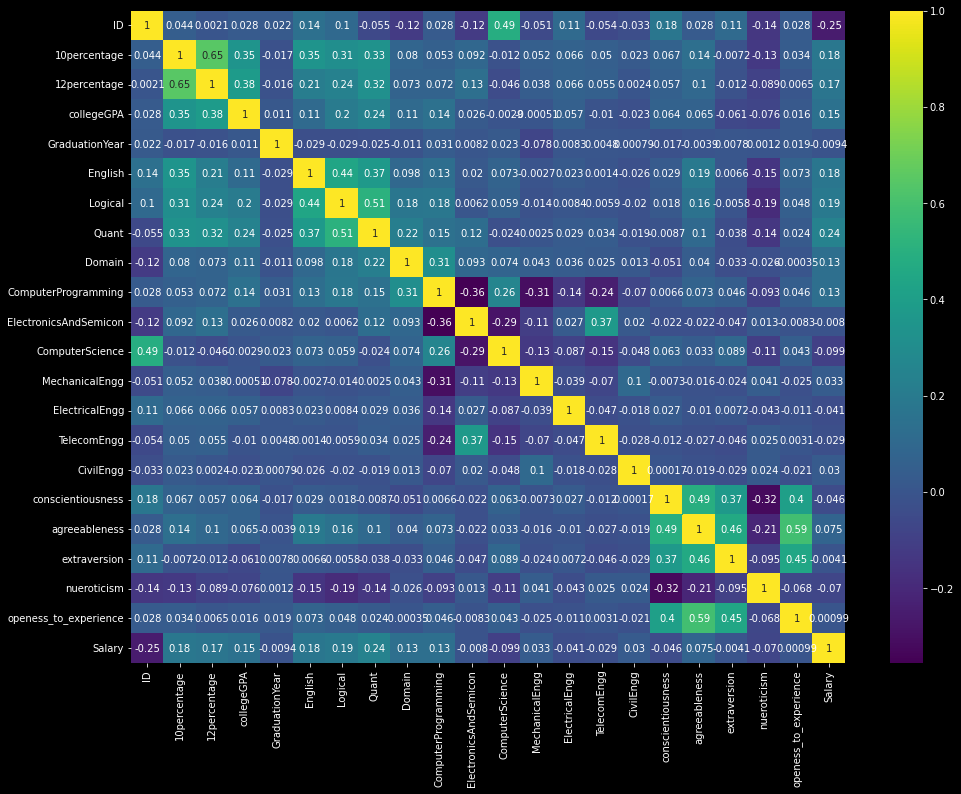

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.show()